In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
# pd.options.display.max_rows = 999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

- In this exercise, we are going to <b>apply K-means on image segmentation</b>. Image segmentation is the process of partitioning an image into multiple segments according to pixel similarity (which determines color, intensity, texture, etc of objects). It can locate objects and boundaries in images to enhance analysis. Applications include locating tumor, measuring tissue volumes, pedestrian detection and face recognition, etc.
- The aim here is to <b>determine the percentage of mica (the darkest colored mineral) in the granite rock in a given image</b>. Mica is a chemical substance widely used as electrical insulators and thermal insulators.

# Load and plot the image
- Using PIL Image, open the image file 'granite.jpg' (assign it to variable name 'I') and plot it using matplotlib.pyplot

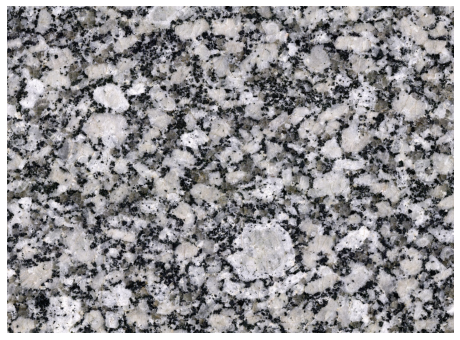

In [2]:
# open the image
from PIL import Image
I = Image.open("img/granite.jpg")
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

- As the luminance of mica and granite are quite distinguishable, we can use grayscale image for simplicity.
- Using convert() of Image object to convert the image into grayscale, assign the new image to variable 'I_gray' and plot it.

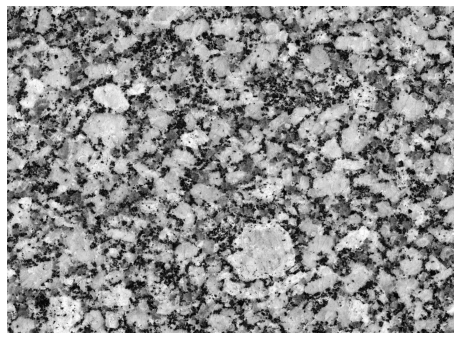

In [3]:
# convert to grayscale
I_gray = I.convert('L')
plt.figure(figsize=(8,8))
plt.imshow(I_gray, cmap='gray')
plt.axis('off')
plt.show()

It seems not much difference from the first image, but now each pixel in the image has only 1 number instead of 3, it combines RGB using the formula <br><br> $$L = R * 299/1000 + G * 587/1000 + B * 114/1000$$.

# Convert the image to numpy array

- Let's take a look at the image dimension first
- Print the width and height of image I

In [4]:
# width and height of image
w, h = I_gray.size
print('width', w)
print('heigth', h)

width 1024
heigth 749


The image has width 1024 and height 749.

- Using np.asarray(), convert the image to numpy array and print the shape.

In [5]:
# convert image to numpy array
a = np.asarray(I_gray)
print('a.shape', a.shape)

a.shape (749, 1024)


- Flatten the image array to n x 1 for fitting in Kmeans model later.

In [6]:
# reshape array 
a = a.reshape(-1, 1)
print('a.shape', a.shape)

a.shape (766976, 1)


# Apply K-means to image array 
- Using sklearn KMeans(), fit the image array with n_clusters=3 and random_state=42.
- Assign the resulting cluster centers to variable name 'centers'.
- Assign the resulting labels to variable name 'labels'.

In [7]:
# Kmeans
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(a)
centers = k_means.cluster_centers_
labels = k_means.labels_

- Print centers.

In [8]:
# print centers
centers

array([[122.05222034],
       [193.05810124],
       [ 35.94047857]])

In [9]:
# get clustered image array
a_cluster = centers[labels]
print('a_cluster shape ', a_cluster.shape)

a_cluster shape  (766976, 1)


- Reshape a_cluster to the original dimensions and plot the clustered image.

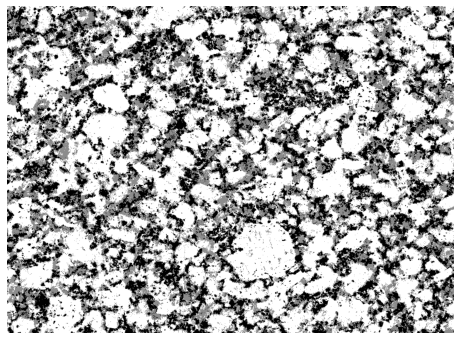

In [10]:
a_cluster = a_cluster.reshape(h, w)
plt.figure(figsize=(8, 8))
plt.imshow(a_cluster,cmap='gray')
plt.axis('off')
plt.show()

# Calculate the percentage of mica in the photo
- Convert the new image array into Image object name 'I_cluster'
- Using getcolors() of Image object, get the frequencies of all three colors in the new image

In [11]:
# count pixel color
I_cluster = Image.fromarray(a_cluster)
colors = I_cluster.getcolors()
print(colors)

[(164781, 35.94047927856445), (372591, 193.05810546875), (229604, 122.0522232055664)]


- In grayscale, pixel values range from 0 (black) to 1 (white). So obviously color with the lowest pixel value represents mica.
- Calculate the percentage of mica in the photo.

In [12]:
# calculate percentage
print ('Percentage of mica = ', 100*float(colors[0][0])/float(w*h), '%')

Percentage of mica =  21.484505382176234 %


In [13]:
# 21.484505382176234 %

One may try running K-means again by varying the parameter random_state, the final result may be different slightly because as we have discussed in sec 3.1, results generated by K-means depend on initial center values.

Reference: https://www.unioviedo.es/compnum/labs/new/kmeans.html